In [113]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

raw_data = pd.read_csv("indian_liver_patient.csv")
print(raw_data.head(5))

   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1 

{'Age': (28.55630734710665, 60.9359739564954), 'Total_Bilirubin': (-2.9107224122864963, 9.508321040073803), 'Direct_Bilirubin': (-1.3223912711752595, 4.294603964142669), 'Alkaline_Phosphotase': (47.63834015170238, 533.5143185103902), 'Alamine_Aminotransferase': (-101.90680543385936, 263.3339066345455), 'Aspartate_Aminotransferase': (-179.00772287677697, 398.8293352266912), 'Total_Protiens': (5.397738910487683, 7.568641878534614), 'Albumin': (2.3463336811714806, 3.937371293099531), 'Albumin_and_Globulin_Ratio': (0.6274717956091491, 1.2666560109538902)}


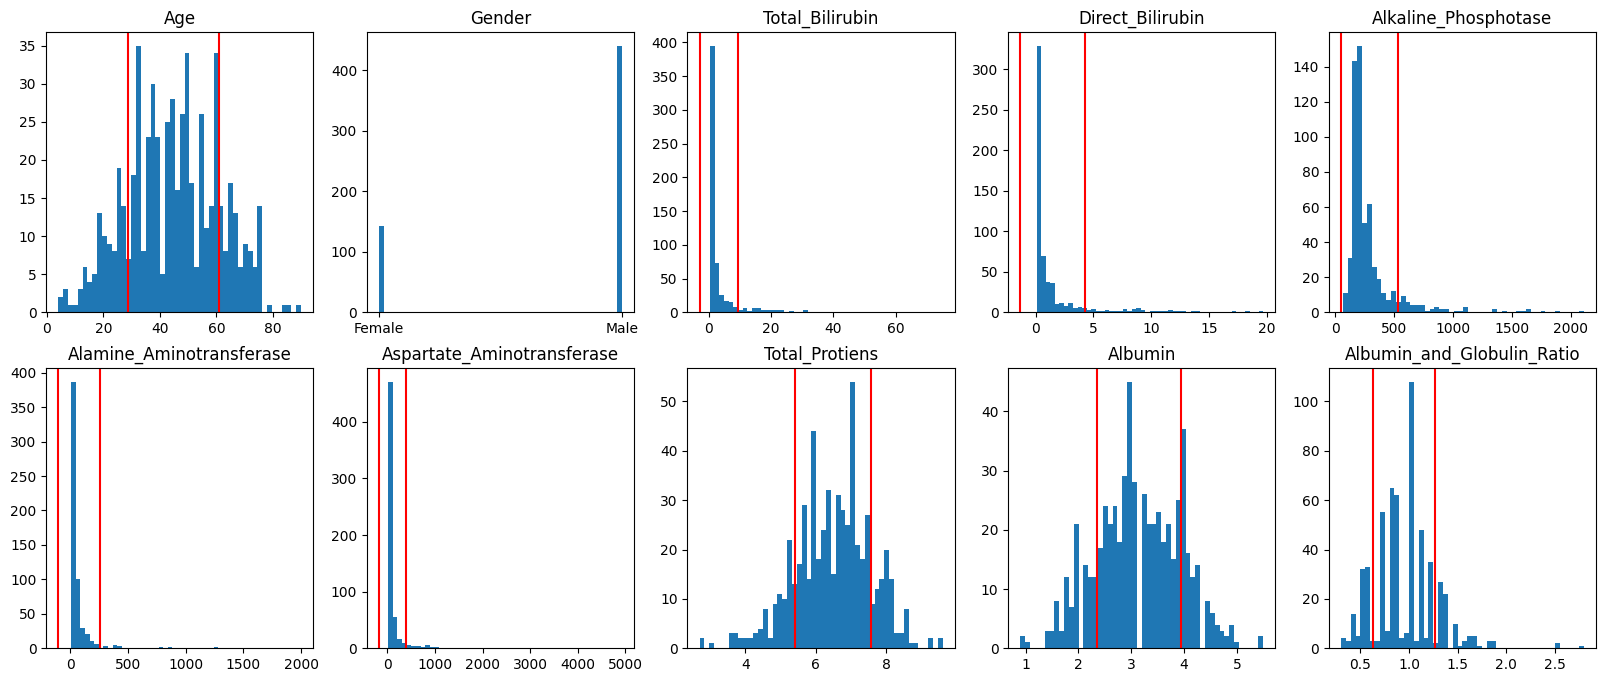

In [114]:
fig1 = plt.figure(figsize = (20, 8))
div_basic = {}
for col_idx in range(len(raw_data.columns[:-1])):
    plt.subplot(2, 5, col_idx + 1)
    col = raw_data.columns[col_idx]
    if (col != "Gender"):
        col_mean = raw_data[col].mean()
        col_std = raw_data[col].std()
        plt.axvline(x = col_mean - col_std, color = "red")
        plt.axvline(x = col_mean + col_std, color = "red")
        div_basic[col] = (col_mean - col_std, col_mean + col_std)
    plt.title(col)
    plt.hist(raw_data[col], bins = 50)
print(div_basic)

Age
1    386
2     99
0     98
Name: count, dtype: int64
Gender
Male      441
Female    142
Name: count, dtype: int64
Total_Bilirubin
1.0    533
2.0     50
Name: count, dtype: int64
Direct_Bilirubin
1.0    527
2.0     56
Name: count, dtype: int64
Alkaline_Phosphotase
1    528
2     55
Name: count, dtype: int64
Alamine_Aminotransferase
1    555
2     28
Name: count, dtype: int64
Aspartate_Aminotransferase
1    552
2     31
Name: count, dtype: int64
Total_Protiens
1.0    410
2.0     89
0.0     84
Name: count, dtype: int64
Albumin
1.0    376
2.0    109
0.0     98
Name: count, dtype: int64
Albumin_and_Globulin_Ratio
1.0    402
0.0     93
2.0     84
Name: count, dtype: int64


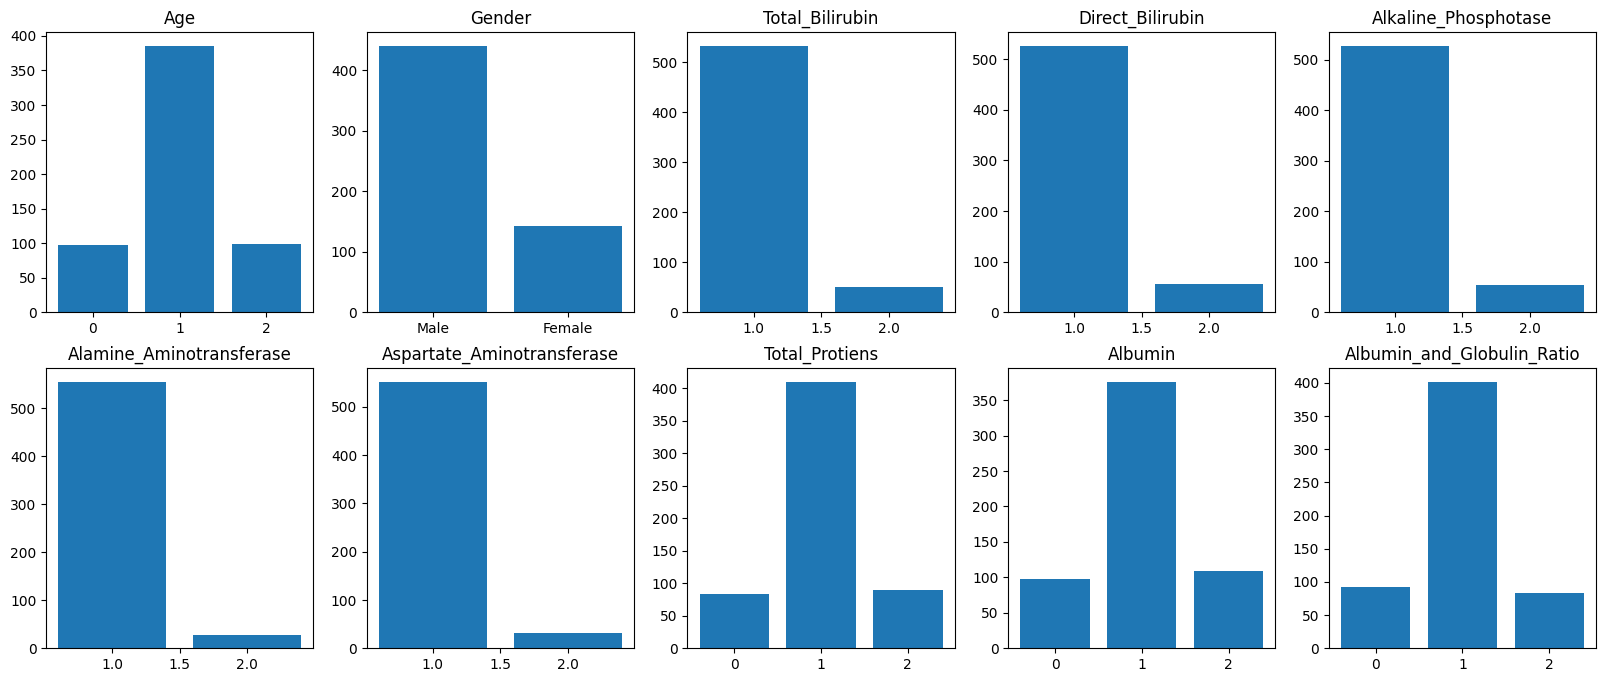

In [115]:
data = raw_data.copy(deep = True)
plt.figure(figsize = (20, 8))
for col_idx in range(len(data.columns[:-1])):
    plt.subplot(2, 5, col_idx + 1)
    col = data.columns[col_idx]
    if (col != "Gender"):
        data.loc[raw_data[col] <= div_basic[col][0], col] = 0
        data.loc[(raw_data[col] > div_basic[col][0])&(raw_data[col] <= div_basic[col][1]), col] = 1
        data.loc[raw_data[col] > div_basic[col][1], col] = 2
    plt.title(col)
    var_cnt = data[col].value_counts()
    x, y = var_cnt.index, var_cnt.values
    print(var_cnt)
    plt.bar(x, y)
# print(data)

In [116]:
print(data)
data.to_csv("processed_data.csv", index = False)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0      2  Female              1.0               1.0                     1   
1      2    Male              2.0               2.0                     2   
2      2    Male              1.0               1.0                     1   
3      1    Male              1.0               1.0                     1   
4      2    Male              1.0               1.0                     1   
..   ...     ...              ...               ...                   ...   
578    1    Male              1.0               1.0                     1   
579    1    Male              1.0               1.0                     1   
580    1    Male              1.0               1.0                     1   
581    1    Male              1.0               1.0                     1   
582    1    Male              1.0               1.0                     1   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  